In [2]:
TEST_PATH  = '/kaggle/input/arabic-numbers-2/dataset/test/'
TRAIN_PATH = '/kaggle/input/arabic-numbers-2/dataset/train/'

In [3]:
import cv2
import pathlib
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_dir = pathlib.Path(TRAIN_PATH)

In [5]:
dfs = []
total = 0

for i in range(1,10):
    image_path = pd.Series(list(data_dir.glob(f'{i}/*'))).astype(str)
    
    labels = pd.Series(np.full((len(image_path)), i))
    
    total += len(image_path)
    print(len(image_path), total)
    
    dfs.append(pd.concat([image_path, labels], axis=1))

738 738
636 1374
621 1995
582 2577
379 2956
427 3383
389 3772
394 4166
463 4629


In [6]:
df = pd.concat(dfs, axis=0, ignore_index=True)

In [7]:
df.columns = ['image_path', 'label']

In [8]:
def read_shape(row):
    # read image
    img = cv2.imread(row[0], -1)
    
    # get shape
    sh = img.shape
    
    return pd.Series(list(sh))

In [9]:
df[['height', 'width']] = df.apply(lambda row: read_shape(row), axis=1)

In [10]:
df['aspect ratio'] = df['width'] / df['height']

In [11]:
df.groupby('label').describe()

height                                                           width  \
       count        mean        std   min    25%    50%    75%    max  count   
label                                                                          
1      738.0  107.754743  14.261305  64.0   99.0  106.5  116.0  160.0  738.0   
2      636.0  110.062893  16.172373  53.0   99.0  108.0  118.0  179.0  636.0   
3      621.0  107.064412  14.092747  63.0   99.0  106.0  115.0  160.0  621.0   
4      582.0  108.731959  14.344314  52.0  100.0  108.0  118.0  155.0  582.0   
5      379.0  109.134565  16.300269  59.0   98.0  107.0  118.5  159.0  379.0   
6      427.0  107.437939  15.516696  53.0   98.0  106.0  116.0  159.0  427.0   
7      389.0  108.627249  14.913060  59.0   99.0  107.0  116.0  202.0  389.0   
8      394.0  109.708122  14.670203  76.0   99.0  108.0  117.0  160.0  394.0   
9      463.0  108.224622  13.757378  59.0  100.0  107.0  116.0  150.0  463.0   

                  ...             aspect ratio                                \
            mean  ...   75%   max        count      mean       std       min   
label             ...                                                          
1      21.421409  ...  22.0  62.0        738.0  0.200587  0.038924  0.105960   
2      36.773585  ...  39.0  61.0        636.0  0.338654  0.051445  0.175000   
3      42.745572  ...  46.0  61.0        621.0  0.404506  0.059117  0.263566   
4      39.273196  ...  42.0  64.0        582.0  0.364746  0.055205  0.163793   
5      35.955145  ...  38.0  55.0        379.0  0.335602  0.050648  0.225352   
6      40.707260  ...  43.0  57.0        427.0  0.384827  0.058887  0.200000   
7      43.329049  ...  46.0  78.0        389.0  0.403864  0.054205  0.194690   
8      41.469543  ...  44.0  60.0        394.0  0.382227  0.043244  0.254902   
9      40.889849  ...  43.0  64.0        463.0  0.381779  0.045083  0.204724   

                                               
            25%       50%       75%       max  
label                                          
1      0.180551  0.194915  0.210526  0.568807  
2      0.314683  0.339623  0.361702  0.698113  
3      0.371681  0.401869  0.429825  0.714286  
4      0.333333  0.370370  0.396040  0.565217  
5      0.308372  0.336634  0.357895  0.593750  
6      0.353492  0.383838  0.408248  0.735849  
7      0.379630  0.398305  0.428571  0.703125  
8      0.359459  0.385896  0.406250  0.542169  
9      0.357798  0.380952  0.400000  0.610169  

[9 rows x 24 columns]

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,4629.0,4.471808,2.639520,1.00000,2.000000,4.000000,7.000000,9.000000
height,4629.0,108.472456,14.878445,52.00000,99.000000,107.000000,117.000000,202.000000
width,4629.0,37.099590,8.491328,14.00000,34.000000,39.000000,43.000000,78.000000
aspect ratio,4629.0,0.346268,0.084521,0.10596,0.308943,0.362637,0.397959,0.735849


In [13]:
new_image_width = 40//2
new_image_height = 108//2
size = len(df)
train_full_labels = df['label'].values
train_full_set = np.empty((size, new_image_height, new_image_width, 1), dtype=np.float32)

for idx, path in enumerate(df['image_path']):
    img = cv2.imread(path, -1)
    img = cv2.resize(img, (new_image_width, new_image_height), interpolation=cv2.INTER_NEAREST)
    train_full_set[idx] = img.reshape(new_image_height, new_image_width, 1)
    

print('train_full_set.shape =>', train_full_set.shape)
print('train_full_labels.shape =>', train_full_labels.shape)

train_full_set.shape => (4629, 54, 20, 1)
train_full_labels.shape => (4629,)


In [189]:
new_image_width = 40//2
new_image_height = 108//2
size = len(df)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,1))
train_full_labels = df['label'].values
train_full_set = np.empty((size, new_image_height, new_image_width, 1), dtype=np.float32)

for idx, path in enumerate(df['image_path']):
    img = cv2.imread(path, -1)
    img = cv2.resize(img, (new_image_width, new_image_height), interpolation=cv2.INTER_NEAREST)
    
    opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
    final = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)

    train_full_set[idx] = final.reshape(new_image_height, new_image_width, 1)

print('train_full_set.shape =>', train_full_set.shape)
print('train_full_labels.shape =>', train_full_labels.shape)

train_full_set.shape => (4629, 54, 20, 1)
train_full_labels.shape => (4629,)


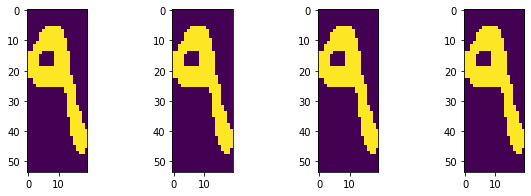

In [187]:
#kernel = np.ones((3,1),np.uint8)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,1))

img = train_full_set[4619]
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
final = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)

fig, ax = plt.subplots(1, 4, figsize=(10, 3))
ax[0].imshow(img)
ax[1].imshow(opening)
ax[2].imshow(closing)
ax[3].imshow(final)

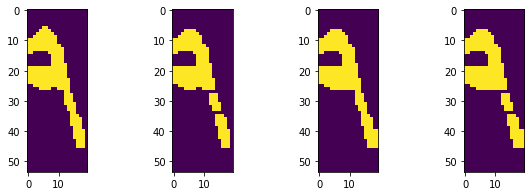

In [176]:
kernel2 = np.ones((3,3),np.uint8)
opening2 = cv2.morphologyEx(final, cv2.MORPH_OPEN, kernel2)
closing2 = cv2.morphologyEx(opening2, cv2.MORPH_CLOSE, kernel2)
final2 = cv2.morphologyEx(closing2, cv2.MORPH_OPEN, kernel2)
fig, ax = plt.subplots(1, 4, figsize=(10, 3))
ax[0].imshow(img)
ax[1].imshow(opening2)
ax[2].imshow(closing2)
ax[3].imshow(final2)

In [190]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_full_set, train_full_labels, 
                                                      test_size=0.05, shuffle=True, random_state=42)

print('X_train.shape =>', X_train.shape)
print('X_valid.shape =>', X_valid.shape)
print('y_train.shape =>', y_train.shape)
print('y_valid.shape =>', y_valid.shape)

X_train.shape => (4397, 54, 20, 1)
X_valid.shape => (232, 54, 20, 1)
y_train.shape => (4397,)
y_valid.shape => (232,)


In [30]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    #rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=False,
    validation_split=0)

In [191]:
model = tf.keras.Sequential([
    
    tf.keras.layers.Flatten(input_shape=[108//2, 40//2]),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    #tf.keras.layers.Dense(64, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')

])

In [192]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 1080)              0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 1080)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                69184     
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
batch_normalization_3 (Batch (None, 64)               

In [193]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [194]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=50)

Epoch 1/50
138/138 [==============================] - 2s 5ms/step - loss: 0.9661 - accuracy: 0.7128 - val_loss: 0.2166 - val_accuracy: 0.9612
Epoch 2/50
138/138 [==============================] - 1s 4ms/step - loss: 0.3727 - accuracy: 0.9054 - val_loss: 0.1730 - val_accuracy: 0.9569
Epoch 3/50
138/138 [==============================] - 1s 4ms/step - loss: 0.2748 - accuracy: 0.9336 - val_loss: 0.1788 - val_accuracy: 0.9655
Epoch 4/50
138/138 [==============================] - 1s 4ms/step - loss: 0.2340 - accuracy: 0.9377 - val_loss: 0.1442 - val_accuracy: 0.9655
Epoch 5/50
138/138 [==============================] - 1s 4ms/step - loss: 0.1991 - accuracy: 0.9516 - val_loss: 0.1339 - val_accuracy: 0.9698
Epoch 6/50
138/138 [==============================] - 1s 4ms/step - loss: 0.1700 - accuracy: 0.9577 - val_loss: 0.1365 - val_accuracy: 0.9655
Epoch 7/50
138/138 [==============================] - 1s 4ms/step - loss: 0.1670 - accuracy: 0.9568 - val_loss: 0.1333 - val_accuracy: 0.9655
Epoch 

In [31]:
history = model.fit(
    datagen.flow(X_train, y_train),
    validation_data=datagen.flow(X_valid, y_valid),
    epochs=50)

Epoch 1/50
138/138 [==============================] - 3s 19ms/step - loss: 2.2828 - accuracy: 0.5026 - val_loss: 0.9602 - val_accuracy: 0.6336
Epoch 2/50
138/138 [==============================] - 3s 21ms/step - loss: 1.3464 - accuracy: 0.5690 - val_loss: 0.7830 - val_accuracy: 0.7543
Epoch 3/50
138/138 [==============================] - 3s 21ms/step - loss: 1.1992 - accuracy: 0.5988 - val_loss: 0.7677 - val_accuracy: 0.7586
Epoch 4/50
138/138 [==============================] - 3s 20ms/step - loss: 1.1396 - accuracy: 0.6220 - val_loss: 0.7041 - val_accuracy: 0.7974
Epoch 5/50
138/138 [==============================] - 3s 19ms/step - loss: 1.0980 - accuracy: 0.6245 - val_loss: 0.7500 - val_accuracy: 0.7759
Epoch 6/50
138/138 [==============================] - 3s 21ms/step - loss: 1.0766 - accuracy: 0.6393 - val_loss: 0.6549 - val_accuracy: 0.7931
Epoch 7/50
138/138 [==============================] - 3s 18ms/step - loss: 1.0607 - accuracy: 0.6402 - val_loss: 0.6825 - val_accuracy: 0.7845

In [20]:
test_dir = pathlib.Path(TEST_PATH)

In [21]:
dfs = []
total = 0

for i in range(1,10):
    image_path = pd.Series(list(test_dir.glob(f'{i}/*'))).astype(str)
    
    labels = pd.Series(np.full((len(image_path)), i))
    
    total += len(image_path)
    print(len(image_path), total)
    
    dfs.append(pd.concat([image_path, labels], axis=1))

100 100
100 200
100 300
100 400
100 500
100 600
100 700
100 800
100 900


In [22]:
test_df = pd.concat(dfs, axis=0, ignore_index=True)
test_df.columns = ['image_path', 'label']

In [195]:
test_full_labels = test_df['label'].values
test_full_set = np.empty((900, new_image_height, new_image_width, 1), dtype=np.float32)
for idx, path in enumerate(test_df['image_path']):
    img = cv2.imread(path, -1)
    img = cv2.resize(img, (new_image_width, new_image_height), interpolation=cv2.INTER_NEAREST)
    
    opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
    final = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)

    test_full_set[idx] = final.reshape(new_image_height, new_image_width, 1)
    
print('test_full_set.shape =>', test_full_set.shape)
print('test_full_labels.shape =>', test_full_labels.shape)

test_full_set.shape => (900, 54, 20, 1)
test_full_labels.shape => (900,)


In [196]:
y_pred = np.argmax(model.predict(test_full_set), axis=-1)

In [197]:
test_df['pred'] = y_pred

In [198]:
misses = test_df[test_df['label'] != test_df['pred']]

In [199]:
misses

,image_path,label,pred
62,/kaggle/input/arabic-numbers-2/dataset/test/1/...,1,3
155,/kaggle/input/arabic-numbers-2/dataset/test/2/...,2,4
172,/kaggle/input/arabic-numbers-2/dataset/test/2/...,2,9
210,/kaggle/input/arabic-numbers-2/dataset/test/3/...,3,6
361,/kaggle/input/arabic-numbers-2/dataset/test/4/...,4,6
413,/kaggle/input/arabic-numbers-2/dataset/test/5/...,5,9
423,/kaggle/input/arabic-numbers-2/dataset/test/5/...,5,3
461,/kaggle/input/arabic-numbers-2/dataset/test/5/...,5,6
477,/kaggle/input/arabic-numbers-2/dataset/test/5/...,5,2
626,/kaggle/input/arabic-numbers-2/dataset/test/7/...,7,5


label:  1 , pred:  3


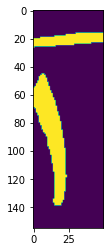

label:  2 , pred:  4


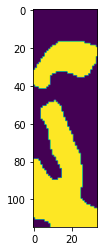

label:  2 , pred:  9


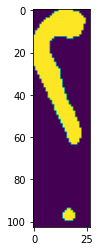

label:  3 , pred:  6


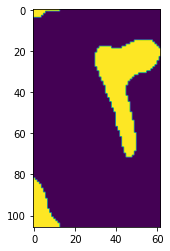

label:  4 , pred:  6


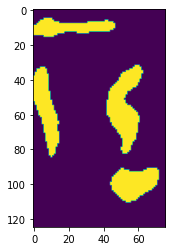

label:  5 , pred:  9


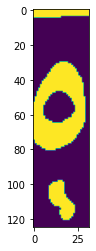

label:  5 , pred:  3


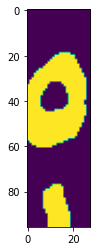

label:  5 , pred:  6


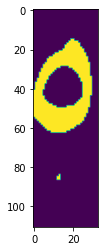

label:  5 , pred:  2


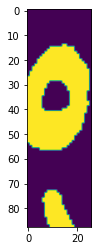

label:  7 , pred:  5


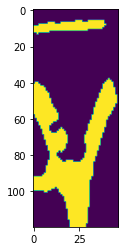

label:  7 , pred:  3


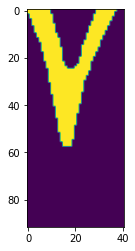

label:  8 , pred:  9


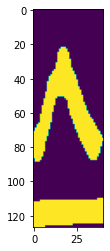

label:  8 , pred:  9


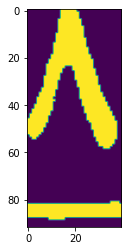

label:  8 , pred:  4


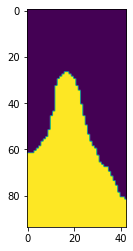

label:  8 , pred:  9


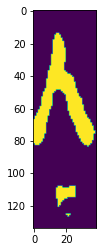

label:  8 , pred:  9


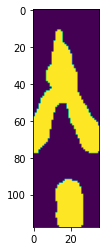

label:  8 , pred:  1


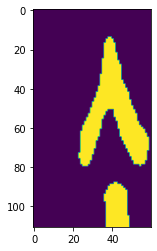

In [200]:
for i in range(len(misses)):
    img = plt.imread(misses.iloc[i][0])
    plt.imshow(img)
    print('label: ', misses.iloc[i][1], ', pred: ', misses.iloc[i][2])
    plt.show()